In [1]:
#data analysis and wrangling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#loading the dataset

hotel = pd.read_csv("hotel_bookings.csv")
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
print (hotel.columns.values)

['hotel' 'is_canceled' 'lead_time' 'arrival_date_year'
 'arrival_date_month' 'arrival_date_week_number'
 'arrival_date_day_of_month' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'adults' 'children' 'babies' 'meal' 'country'
 'market_segment' 'distribution_channel' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'reserved_room_type' 'assigned_room_type' 'booking_changes'
 'deposit_type' 'agent' 'company' 'days_in_waiting_list' 'customer_type'
 'adr' 'required_car_parking_spaces' 'total_of_special_requests'
 'reservation_status' 'reservation_status_date']


In [4]:
#preview the data 

hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#drop the 'company' and 'agent' columns 

hotel = hotel.drop(['company', 'agent'], axis=1)
hotel = hotel.dropna(subset=['country', 'children', 'arrival_date_week_number'], axis=0)
hotel = hotel.reset_index(drop=True)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#convert 'children' column that float data type into int data type

hotel['children'] = hotel['children'].astype(int)
hotel['children'].dtype 


dtype('int32')

In [7]:
# Checking for the missing values after drops

NaN_updated = hotel.isna().sum()
NaN_updated

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [8]:
# Converting string month to numerical one (Dec = 12, Jan = 1, etc.)
# data standardized
datetime_object = hotel['arrival_date_month'].str[0:3]
month_number = np.zeros(len(datetime_object))

# Creating a new column based on numerical representation of the months

for i in range(0, len(datetime_object)):
    datetime_object[i] = datetime.datetime.strptime(datetime_object[i], "%b")
    month_number[i] = datetime_object[i].month

# Float to integer conversion

month_number = pd.DataFrame(month_number).astype(int)

In [9]:
# 3 columns are merged into one

hotel['arrival_date'] = hotel['arrival_date_year'].map(str) + '-' + month_number[0].map(str) + '-' \
                       + hotel['arrival_date_day_of_month'].map(str)

In [10]:
# Dropping that already used columns

hotel = hotel.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
                  'arrival_date_week_number'], axis=1)
hotel.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-7-1


In [11]:
# Converting wrong datatype columns to correct type (object to datetime)

hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date'])
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])

print('Datatype of the arrival_date:', hotel['arrival_date'].dtype)
print('Datatype of the reservation_status_date:', hotel['reservation_status_date'].dtype)

Datatype of the arrival_date: datetime64[ns]
Datatype of the reservation_status_date: datetime64[ns]


In [12]:
# Calculating total guests for each record

hotel['Total Guests'] = hotel['adults'] + hotel['children']
hotel['Total Guests'].head(10)

0    2
1    2
2    1
3    1
4    2
5    2
6    2
7    2
8    2
9    2
Name: Total Guests, dtype: int64

In [13]:
# Some data points include zero Total Guests,
# therefore the zero value need to dropped them

hotel = hotel[hotel['Total Guests'] != 0]

In [14]:
# Total Number of Days Stayed

hotel['Total Stays'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']

hotelNoCancel = hotel[hotel['is_canceled'] == 0]
hotelNoCancel = hotelNoCancel.reset_index(drop=True)

In [15]:
# Creating two dataframes include only discrete hotel type

hotelResort = hotel[hotel['hotel'] == 'Resort Hotel']
hotelCity = hotel[hotel['hotel'] == 'City Hotel']

hotel = hotel.reset_index(drop=True)

In [16]:
# Calculating Number of Guests Weekly - Resort Hotel

NumberOfGuests_Resort = hotelResort[['arrival_date', 'Total Guests']]
NumberOfGuests_ResortWeekly = hotelResort['Total Guests'].groupby(hotelResort['arrival_date']).sum()
NumberOfGuests_ResortWeekly = NumberOfGuests_ResortWeekly.resample('w').sum().to_frame()
NumberOfGuests_ResortWeekly.head(10)

,Total Guests
arrival_date,
2015-07-05,464
2015-07-12,597
2015-07-19,723
2015-07-26,698
2015-08-02,769
2015-08-09,648
2015-08-16,774
2015-08-23,663
2015-08-30,658


In [17]:
# Calculating Number of Guests Weekly - City Hotel

NumberOfGuests_City = hotelCity[['arrival_date', 'Total Guests']]
NumberOfGuests_CityWeekly = hotelCity['Total Guests'].groupby(hotelCity['arrival_date']).sum()
NumberOfGuests_CityWeekly = NumberOfGuests_CityWeekly.resample('w').sum().to_frame()
NumberOfGuests_CityWeekly.head(10)

,Total Guests
arrival_date,
2015-07-05,354
2015-07-12,440
2015-07-19,646
2015-07-26,876
2015-08-02,445
2015-08-09,1143
2015-08-16,1616
2015-08-23,911
2015-08-30,965


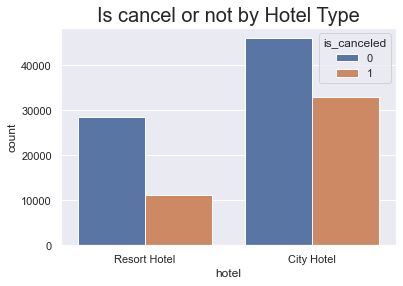

In [18]:
# How many Bookings were Cancelled by Hotel Type?

sns.set(style = "darkgrid")
plt.title("Is cancel or not by Hotel Type", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = hotel)

#About 27% of resort hotel bookings have been cancelled and
#about 40% of city hotel bookings have been cancelled. 
#These figures are high and have possible effects
#for hotels in terms of sales and revenue.

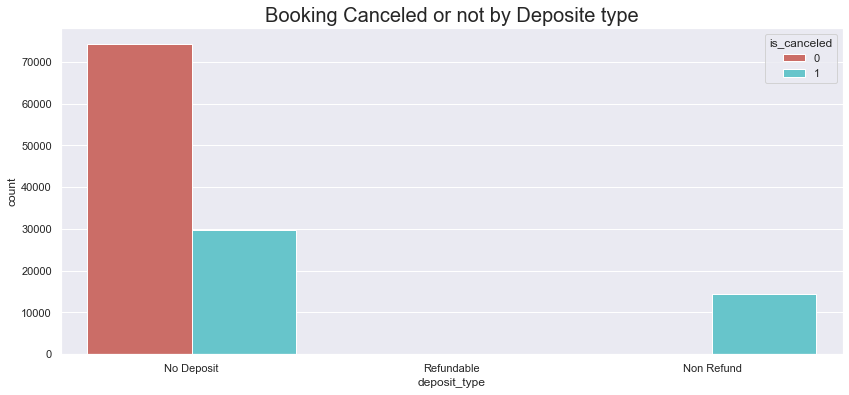

In [19]:
# deposit type vs cancellation status

plt.figure(figsize=(14,6))
plt.title("Booking Canceled or not by Deposite type", fontdict = {'fontsize': 20})
sns.countplot(x='deposit_type',data=hotel,hue='is_canceled',palette='hls')
plt.show()

#Around 28% of bookings were canceled by guests with no deposit, followed by 22% bookings were canceled with Refundable. 
#These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

In [27]:
from sklearn.model_selection import train_test_split

# Select features and label
features = hotel.drop(['is_canceled'], axis=1)
label = hotel['is_canceled']

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state= 3)

In [28]:
explore_data = pd.concat([X_train, y_train], axis=1).copy()

explore_data.columns

Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'Total Guests', 'Total Stays', 'Total_nights', 'is_canceled'],
      dtype='object')

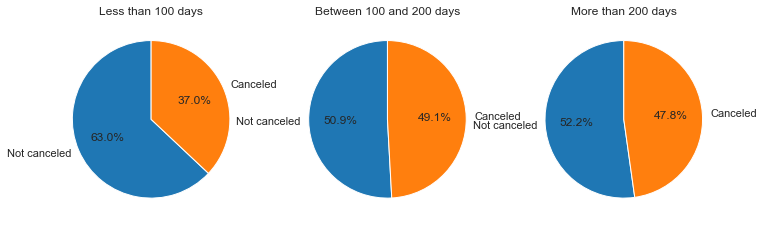

In [29]:
# Find ratio of cancellation due to days in waiting list

# Separate into three groups
cancel_because_waiting1  = explore_data.loc[(explore_data['days_in_waiting_list'] >= 0) & (explore_data['days_in_waiting_list'] < 100), ['days_in_waiting_list', 'is_canceled'] ]
cancel_because_waiting2  = explore_data.loc[(explore_data['days_in_waiting_list'] >= 100) & (explore_data['days_in_waiting_list'] < 200), ['days_in_waiting_list', 'is_canceled'] ]
cancel_because_waiting3  = explore_data.loc[(explore_data['days_in_waiting_list'] >= 200) , ['days_in_waiting_list', 'is_canceled'] ]

# Calculate in percentage
cancel_because_waiting1 = cancel_because_waiting1['is_canceled'].value_counts(normalize=True) * 100
cancel_because_waiting2 = cancel_because_waiting2['is_canceled'].value_counts(normalize=True) * 100
cancel_because_waiting3 = cancel_because_waiting3['is_canceled'].value_counts(normalize=True) * 100

# Plot
_, axs = plt.subplots(1, 3, figsize=(12, 18))
axs[0].pie(cancel_because_waiting1, labels = ['Not canceled', 'Canceled'], autopct='%1.1f%%', startangle=90)
axs[1].pie(cancel_because_waiting2, labels = ['Not canceled', 'Canceled'], autopct='%1.1f%%', startangle=90)
axs[2].pie(cancel_because_waiting3, labels = ['Not canceled', 'Canceled'], autopct='%1.1f%%', startangle=90)

axs[0].title.set_text('Less than 100 days')
axs[1].title.set_text('Between 100 and 200 days')
axs[2].title.set_text('More than 200 days')

plt.show()

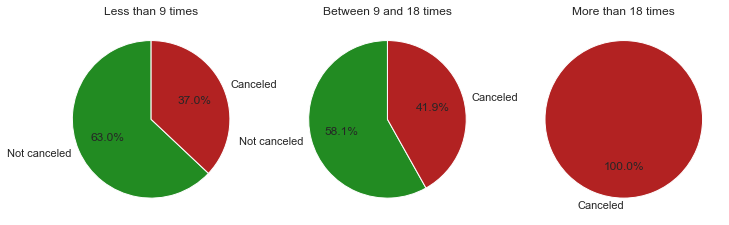

In [30]:
# Find ratio of cancellation due to previous cancellation

# Separate into three segments
previous_cancel1 = explore_data.loc[ explore_data['previous_cancellations'] < 9, ['previous_cancellations', 'is_canceled']]
previous_cancel2 = explore_data.loc[ (explore_data['previous_cancellations'] >= 9) & (explore_data['previous_cancellations'] < 18), ['previous_cancellations', 'is_canceled']]
previous_cancel3 = explore_data.loc[ explore_data['previous_cancellations'] >= 18, ['previous_cancellations', 'is_canceled']]

# Calculate in percentage 
previous_cancel1 = previous_cancel1['is_canceled'].value_counts(normalize=True) * 100
previous_cancel2 = previous_cancel2['is_canceled'].value_counts(normalize=True) * 100
previous_cancel3 = previous_cancel3['is_canceled'].value_counts(normalize=True) * 100

# Simulate
_, axs = plt.subplots(1, 3, figsize=(12, 18))
axs[0].pie(previous_cancel1, labels = ['Not canceled', 'Canceled'], autopct='%1.1f%%', startangle=90, colors=['forestgreen', 'firebrick'])
axs[1].pie(previous_cancel2, labels = ['Not canceled', 'Canceled'], autopct='%1.1f%%', startangle=90, colors=['forestgreen', 'firebrick'])
axs[2].pie(previous_cancel3, labels = ['Canceled'], autopct='%1.1f%%', startangle=90, colors=['firebrick'])

axs[0].title.set_text('Less than 9 times')
axs[1].title.set_text('Between 9 and 18 times')
axs[2].title.set_text('More than 18 times')

plt.show()